# Trabalho 3 - Operações Morfológicas Para Reconhecimento de texto

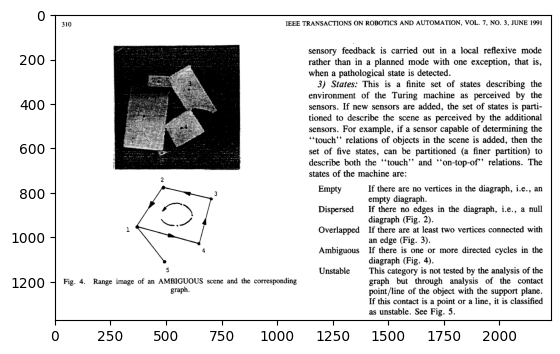

In [80]:
import cv2
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
#reading images used
img=iio.imread("bitmap.pbm")

plt.imshow(img, cmap= "gray",vmin=0,vmax=255)
plt.show()

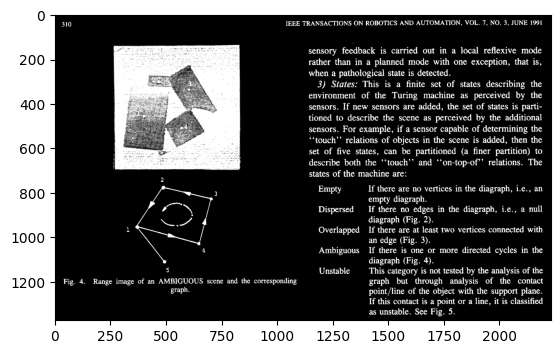

In [81]:
#inversão da imagem
img = 255-img
plt.imshow(img, cmap= "gray",vmin=0,vmax=255)
plt.show()

## Passo 1


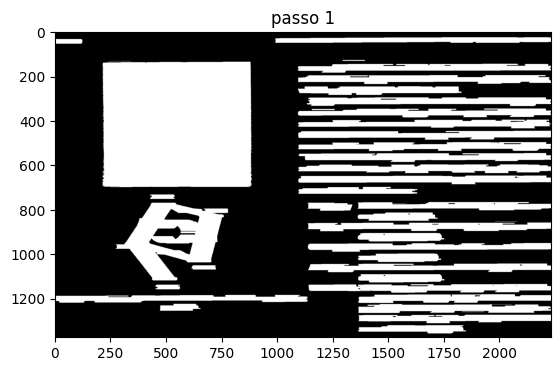

In [82]:
kernel1 = np.ones((1,100), np.uint8) 

img_dilation = cv2.dilate(img, kernel1, iterations=1) 
plt.imshow(img_dilation, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 1")
plt.show()

## Passo 2

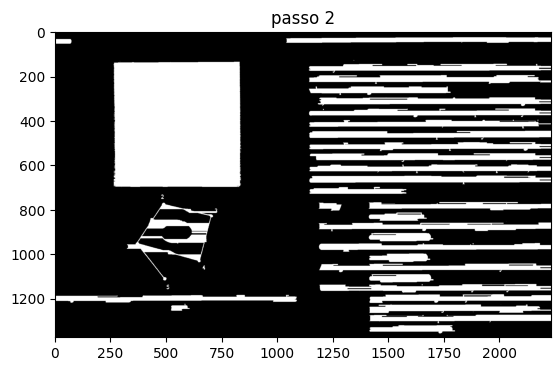

In [83]:
img_erosion = cv2.erode(img_dilation, kernel1, iterations=1) 
plt.imshow(img_erosion, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 2")
plt.show()

## Passo 3

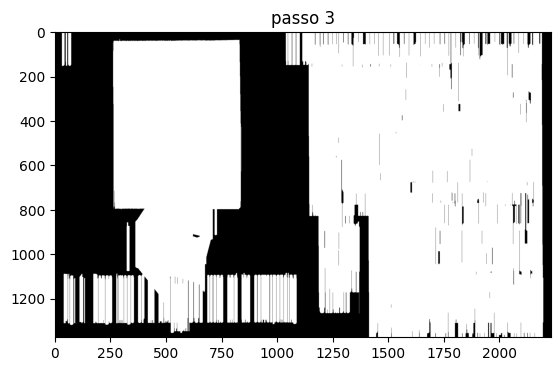

In [84]:
kernel2 = np.ones((200,1), np.uint8) 
img_dilation2 = cv2.dilate(img, kernel2, iterations=1) 
plt.imshow(img_dilation2, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 3")
plt.show()

## Passo 4

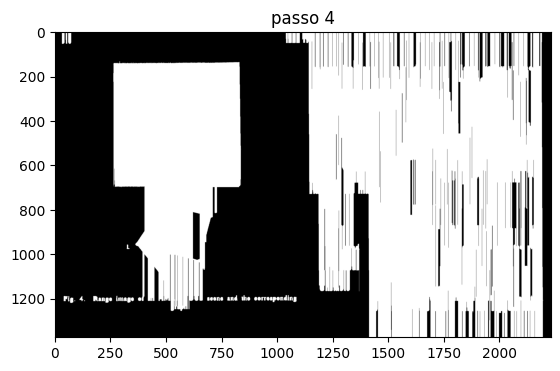

In [85]:
img_erosion2 = cv2.erode(img_dilation2, kernel2, iterations=1) 
plt.imshow(img_erosion2, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 4")
plt.show()

## Passo 5

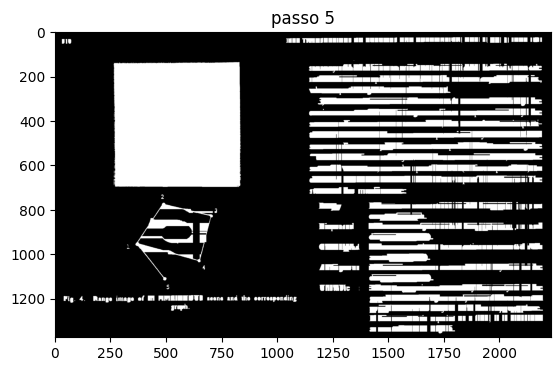

In [86]:
img_and = cv2.bitwise_and(img_erosion, img_erosion2)
plt.imshow(img_and, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 5")
plt.show()

# Passo 6

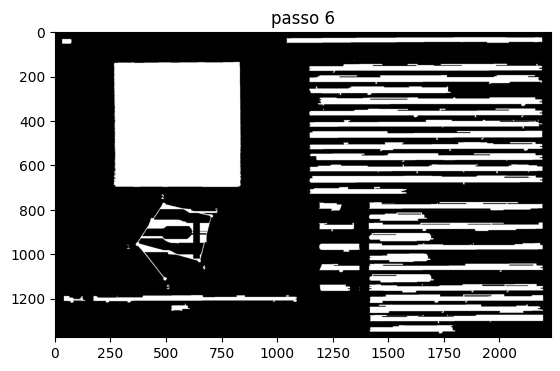

In [87]:
kernel6 = np.ones((1, 30), np.uint8) 
img_closing = cv2.morphologyEx(img_and, cv2.MORPH_CLOSE, kernel6)
plt.imshow(img_closing, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 6")
plt.show()

## Passo 7

[INFO] examining component 1/54 (background) : 2177519; x:0, y:0, w:2233, h:1374
[INFO] examining component 2/54 : 24201; x:1039, y:28, w:1150, h:25
[INFO] examining component 3/54 : 866; x:32, y:36, w:42, h:21
[INFO] examining component 4/54 : 4; x:1343, y:131, w:2, h:3
[INFO] examining component 5/54 : 315070; x:264, y:139, w:572, h:561
[INFO] examining component 6/54 : 26026; x:1142, y:147, w:1046, h:40
[INFO] examining component 7/54 : 27655; x:1142, y:198, w:1046, h:40
[INFO] examining component 8/54 : 16418; x:1142, y:248, w:636, h:39
[INFO] examining component 9/54 : 27082; x:1182, y:298, w:1007, h:39
[INFO] examining component 10/54 : 24980; x:1142, y:348, w:1047, h:40
[INFO] examining component 11/54 : 18; x:1205, y:350, w:4, h:5
[INFO] examining component 12/54 : 23916; x:1144, y:399, w:1045, h:38
[INFO] examining component 13/54 : 17; x:2169, y:398, w:4, h:5
[INFO] examining component 14/54 : 27645; x:1143, y:448, w:1046, h:40
[INFO] examining component 15/54 : 25112; x:1144

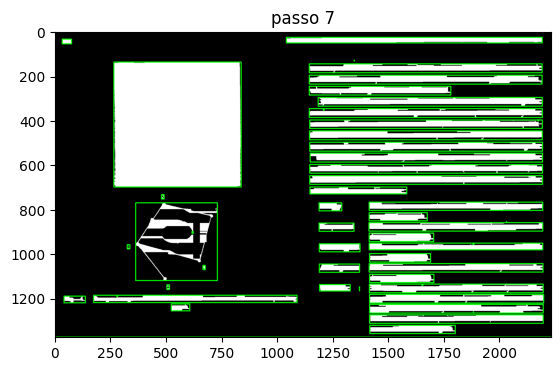

In [88]:
gray = cv2.cvtColor(img_closing, cv2.COLOR_BGR2GRAY)
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU)[1]
output = cv2.connectedComponentsWithStats(
	binary, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

output = binary.copy()
output = cv2.cvtColor(output, cv2.COLOR_GRAY2RGB)

for i in range(0, numLabels):
    if i == 0:
        text = "examining component {}/{} (background)".format(i + 1, numLabels)
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]
    cv2.rectangle(output, (x, y), (x + w, y + h), (0,255,0), 3)
    print("[INFO] {} : {}; x:{}, y:{}, w:{}, h:{}".format(text, area, x, y, w, h))

print(numLabels)
plt.imshow(output, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 7")
plt.show()

## Passo 8

[INFO] examining component 2/54; area: 24201, area retangulo: 28750 razao: 0.84 razao transicao: 0.12
[INFO] examining component 3/54; area: 866, area retangulo: 882 razao: 0.98 razao transicao: 0.00
[INFO] examining component 4/54; area: 4, area retangulo: 6 razao: 0.67 razao transicao: 1.00
[INFO] examining component 5/54; area: 315070, area retangulo: 320892 razao: 0.98 razao transicao: 0.15
[INFO] examining component 6/54; area: 26026, area retangulo: 41840 razao: 0.62 razao transicao: 0.20
[INFO] examining component 7/54; area: 27655, area retangulo: 41840 razao: 0.66 razao transicao: 0.12
[INFO] examining component 8/54; area: 16418, area retangulo: 24804 razao: 0.66 razao transicao: 0.10
[INFO] examining component 9/54; area: 27082, area retangulo: 39273 razao: 0.69 razao transicao: 0.08
[INFO] examining component 10/54; area: 24980, area retangulo: 41880 razao: 0.60 razao transicao: 0.28
[INFO] examining component 11/54; area: 18, area retangulo: 20 razao: 0.90 razao transicao:

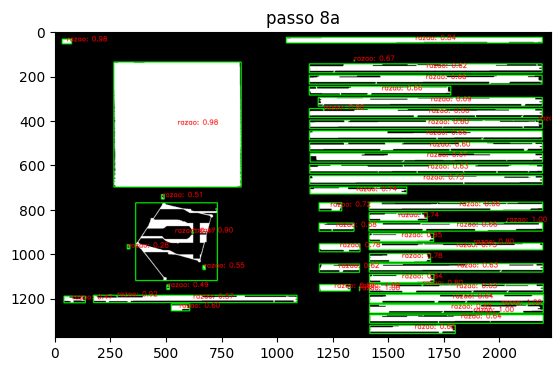

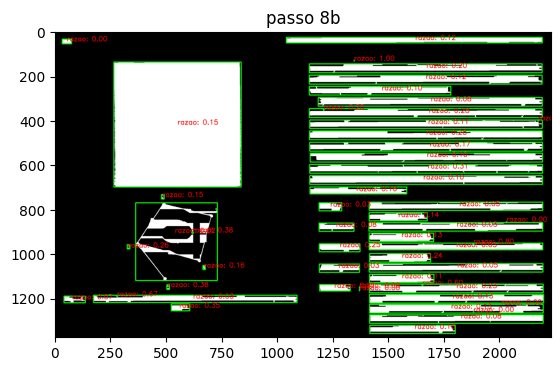

In [89]:
gray = cv2.cvtColor(img_closing, cv2.COLOR_BGR2GRAY)
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU)[1]
output = cv2.connectedComponentsWithStats(
	binary, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

outputA = binary.copy()
outputA = cv2.cvtColor(outputA, cv2.COLOR_GRAY2RGB)

outputB = binary.copy()
outputB = cv2.cvtColor(outputB, cv2.COLOR_GRAY2RGB)


for i in range(0, numLabels):
    if i == 0:
        text = "examining component {}/{} (background)".format(i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    # extract the connected component statistics and centroid for
    # the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
        areaRetangulo = w*h
        razao = area/areaRetangulo
        (cX, cY) = centroids[i]
        cv2.rectangle(outputA, (x, y), (x + w, y + h), (0,255,0), 3)
        cv2.rectangle(outputB, (x, y), (x + w, y + h), (0,255,0), 3)
        cv2.putText(outputA, "razao: {:,.2f}".format(razao), (int(cX), int(cY)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, )

        transicoes = 0
        for i in range(x,x+w):
            for j in range(y, y+h):
                if(binary[j,x+1]>binary[j,x]):
                    transicoes+=1
        for i in range(x,x+w):
            for j in range(y, y+h):
                if(binary[j+1,x]>binary[j,x]):
                    transicoes+=1
        razao_transicao = transicoes/areaRetangulo
        cv2.putText(outputB, "razao: {:.2f}".format(razao_transicao), (int(cX), int(cY)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, )
        print("[INFO] {}; area: {}, area retangulo: {} razao: {:,.2f} razao transicao: {:,.2f}".format(text, area,areaRetangulo, razao, razao_transicao))

print(numLabels)
plt.imshow(outputA, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 8a")
plt.show()
plt.imshow(outputB, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 8b")
plt.show()

## Passo 9

Número de linhas:  34


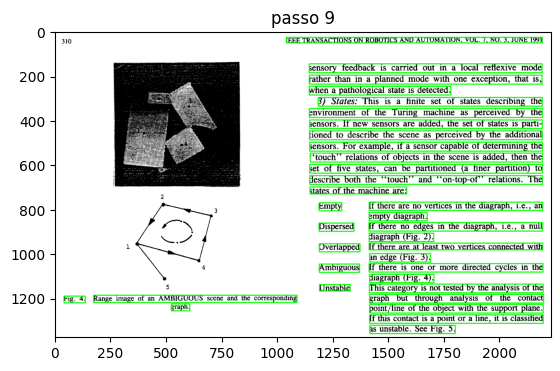

In [90]:
gray = cv2.cvtColor(img_closing, cv2.COLOR_BGR2GRAY)
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU)[1]
output = cv2.connectedComponentsWithStats(
	binary, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

outputA = img.copy()
outputA = 255 - outputA
num_linhas = 0
for i in range(1, numLabels):
    text = "examining component {}/{}".format( i + 1, numLabels)
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    areaRetangulo = w*h
    razao = area/areaRetangulo
    (cX, cY) = centroids[i]

    transicoes = 0
    for i in range(x,x+w):
        for j in range(y, y+h):
            if(binary[j,x+1]>binary[j,x]):
                transicoes+=1
    for i in range(x,x+w):
        for j in range(y, y+h):
            if(binary[j+1,x]>binary[j,x]):
                transicoes+=1
    razao_transicao = transicoes/areaRetangulo
    if( 0.47 < razao < 0.9 and 1>razao_transicao>0 and area > 200):
        num_linhas += 1
        cv2.rectangle(outputA, (x, y), (x + w, y + h), (0,255,0), 3)

plt.imshow(outputA, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 9")
print("Número de linhas: ", num_linhas)


## Passo 10

Número final de palavras:  244


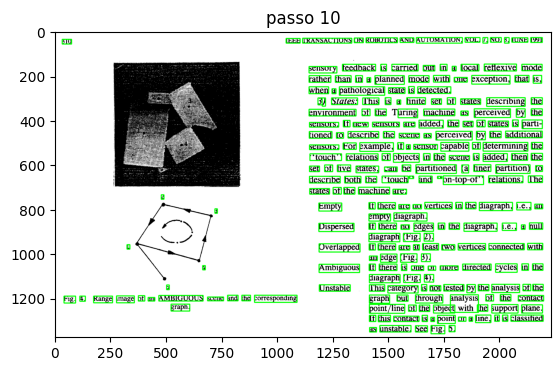

In [91]:
kernel10 = np.ones((1, 10), np.uint8) 
kernel11 = np.ones((10,1), np.uint8) 
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel10)
img_closing = cv2.morphologyEx(img_closing, cv2.MORPH_CLOSE, kernel11)

gray = cv2.cvtColor(img_closing, cv2.COLOR_BGR2GRAY)
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU)[1]
output = cv2.connectedComponentsWithStats(
	binary, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

outputA = img.copy()
outputA = 255 - outputA

num_palavras = 0
for i in range(1, numLabels):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    areaRetangulo = w*h
    razao = area/areaRetangulo
    (cX, cY) = centroids[i]

    transicoes = 0
    for i in range(x,x+w):
        for j in range(y, y+h):
            if(binary[j,x+1]>binary[j,x]):
                transicoes+=1
    for i in range(x,x+w):
        for j in range(y, y+h):
            if(binary[j+1,x]>binary[j,x]):
                transicoes+=1
    razao_transicao = transicoes/areaRetangulo
    if( 0.2 < razao < 0.95 and 1>razao_transicao>0 and area>70):
        num_palavras += 1
        cv2.rectangle(outputA, (x, y), (x + w, y + h), (0,255,0), 3)
plt.imshow(outputA, cmap= "gray",vmin=0,vmax=255)
plt.title("passo 10")
print("Número final de palavras: ", num_palavras)

